In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, make_scorer
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
train_df = pd.read_csv('../data/train.csv').drop('Id', axis=1)
X, y = train_df.drop(['SalePrice'], axis=1), train_df['SalePrice']
X.shape

(1460, 79)

In [13]:
np.sqrt(mean_squared_error(y, [y.mean()] * len(y)))

79415.29188606751

In [15]:
np.sqrt(np.mean((np.log(y) - np.log(y.mean())) ** 2))

0.407600507698506

In [7]:
np.sqrt(823607734)

28698.566758637964

In [8]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

## 型確認

In [51]:
n_numbers = len(X.select_dtypes(include='number').columns)
n_str = len(X.select_dtypes(include='object').columns)
n_features = len(X.columns)
print(f'数値特徴量: {n_numbers} / {n_features}')
print(f'カテゴリ特徴量: {n_str} / {n_features}')
X.dtypes

数値特徴量: 36 / 79
カテゴリ特徴量: 43 / 79


MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


## 欠損値確認

In [33]:
na_sum_series = train_df.isnull().sum()
target_series = na_sum_series[na_sum_series > 0]
na_columns = target_series.index.tolist()
missing_info_df = pd.DataFrame(
    {
        '欠損値数': target_series,
        '型': train_df[na_columns].dtypes
    }
)
missing_info_df.sort_values(by='欠損値数', ascending=False)

,欠損値数,型
PoolQC,1453,object
MiscFeature,1406,object
Alley,1369,object
Fence,1179,object
FireplaceQu,690,object
LotFrontage,259,float64
GarageType,81,object
GarageYrBlt,81,float64
GarageFinish,81,object
GarageQual,81,object


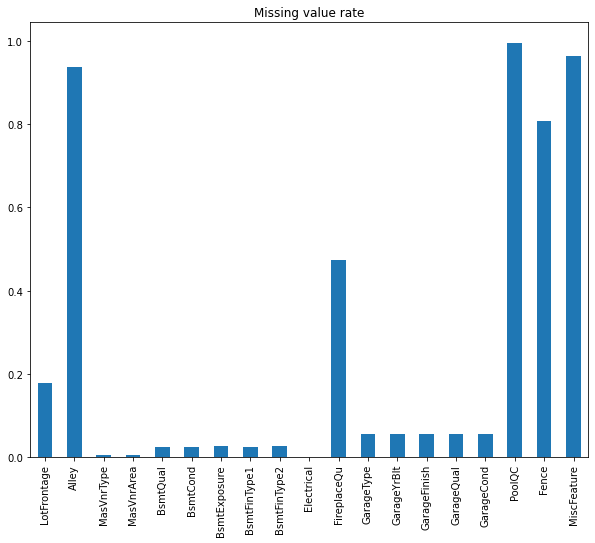

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
(train_df.isnull().mean()[train_df.isnull().sum() > 0]).abs().plot.bar(ax=ax)
plt.title('Missing value rate')
plt.show()

## 変数の説明(一部ないものがあるよう)

1. MSSubClass: 販売に関わる住居のタイプを示す
 - 20 1946年以降の1階建ておよびそれ以前のすべてのスタイル
 - 30 1945年以降の1階建て
 - 40 平屋建て（屋根裏部屋付き） 全年齢対象
 - 45 1-1/2 階建て - 未完成 全年齢
 - 50 1-1/2階建ての完成品（全年齢
 - 60 2階建て1946年以降
 - 70 2階建て1945年以降
 - 75 2-1/2階建ての全年齢層
 - 80 分割または複数階建て
 - 85 スプリットホワイエ
 - 90 二世帯住宅 - すべての様式と年代
 - 120 1階建てPUD（計画的ユニット開発）- 1946年以降
 - 150 1-1/2階建てPUD - 全年齢対象
 - 160 2階建てPUD-1946年以降
 - 180 パッド-多層階-スプリットレバー/ホワイエを含む
 - 190 2世帯住宅 - すべてのスタイルと年齢層

2. MSSubClass: 販売物件の一般的なゾーニング分類を示す。

 - A 農業
 - C 商業
 - FV フローティング・ビレッジ・レジデンシャル
 - I 工業
 - RH 高密度住宅
 - RL 低密度住宅
 - RP 低密度住宅用公園 
 - RM 中密度住宅

3. LotFrontage: 土地に接続されている道路の直線距離(数値)

4. LotArea: 平方フィートでのロットサイズ(数値)

5. Street: 住宅への道路の種類

 - Grvl 砂利
 - Pave 舗装された道路

6. Alley: 敷地にアクセスする路地の種類

 - Grvl 砂利道
 - Pave 舗装されている道
 - NA 路地へのアクセスなし => NAN扱いされている可能性が高い

7. LotShape: 敷地の一般的な形状

 - Reg 規則正しい
 - IR1 わずかに不規則
 - IR2 ほどよく不規則
 - IR3 不規則
       
8. LandContour: 敷地の平坦度

 - Lvl 平坦に近い/平坦	
 - Bnk 道路勾配から建物まで素早く大きく上昇する。
 - HLS 側面から側面への著しい傾斜
 - Low 低い窪地

9. Utilities: 利用可能な公共施設

 - AllPub すべての公共施設
 - NoSewr 電気、ガス、水道（浄化槽）
 - NoSeWa 電気とガスのみ
 - ELO 電気のみ

10. LotConfig: 敷地構成

 - Inside 敷地内
 - Corner 角地
 - CulDSac カルドサック
 - FR2 2辺の間口
 - FR3 3辺の間口


11. LandSlope: 敷地の勾配

 - Gtl 緩やかな勾配
 - Mod 中程度の勾配
 - Sev 厳しい傾斜

12. Neighborhood: 近い街

 - Blmngtn Bloomington Heights
 - Blueste Bluestem
 - BrDale Briardale
 - BrkSide Brookside
 - ClearCr Clear Creek
 - CollgCr College Creek
 - Crawfor Crawford
 - Edwards Edwards
 - Gilbert Gilbert
 - IDOTRR Iowa DOT and Rail Road
 - MeadowV Meadow Village
 - Mitchel Mitchell
 - Names North Ames
 - NoRidge Northridge
 - NPkVill Northpark Villa
 - NridgHt Northridge Heights
 - NWAmes Northwest Ames
 - OldTown Old Town
 - SWISU South & West of Iowa State University
 - Sawyer Sawyer
 - SawyerW Sawyer West
 - Somerst Somerset
 - StoneBr Stone Brook
 - Timber Timberland
 - Veenker Veenker

13. Condition1：立地

 - Artery 幹線道路に近接
 - Feedr 道路に隣接
 - Norm 普通
 - RRNn 南北方向鉄道から200'以内
 - RRAn 南北方向の鉄道に隣接している。
 - PosN 公園、緑地帯など、敷地外の良好な地物に近い。
 - PosA 敷地外のポジティブな特徴に隣接している
 - RRNe 東西方向の鉄道から200フィート以内
 - RRAe 東西鉄道に隣接する

14. Condition2: 立地2（複数存在する場合）。Condition1と同様


15. BldgType: 住居の種類
 - 1Fam 一戸建て
 - 2FmCon 二世帯住宅への転換、元々は一世帯住宅として建設された。
 - Duplx 二世帯住宅
 - TwnhsE タウンハウスエンドユニット
 - TwnhsI タウンハウス インサイドユニット

16. HouseStyle: 何階建てとか

 - 1Story 1階建て
 - 1.5Fin 1.5階建て：2階部分は完成済み
 - 1.5Unf 1.5階建て：2階部分未完成
 - 2Story 2階建て
 - 2.5Fin 2.5階建て：2階部分完成品
 - 2.5Unf 2.5階建て：2階部分未完成
 - SFoyer スプリットホワイエ
 - SLvl スプリットレベル

17. OverallQual: 家全体の素材や仕上げを評価する。

 - 10 非常に優れている
 - 9 非常に良い
 - 8 非常に良い
 - 7 良い
 - 6 平均以上
 - 5 平均的
 - 4 平均以下
 - 3 普通
 - 2 悪い
 - 1 非常に悪い

18. OverallCond: 家の状態

 - 10 非常に良い
 - 9 非常に良い
 - 8 非常に良い
 - 7 良い
 - 6 平均以上
 - 5 平均的
 - 4 平均以
 - 3 普通
 - 2 悪い
 - 1 非常に悪い

19. YearBuilt: 築年月(数値)

20. YearRemodAdd: リフォームした日付(リフォームなしの場合は、YearBuiltと同じ. 数値)

21. RoofStyle: 屋根の種類

 - Flat たいら
 - Gable 切妻屋根(よく見る形の屋根)
 - Gambrel ギャンブレル屋根(https://ja.wikipedia.org/wiki/ギャンブレル屋根)
 - Hip 寄棟造(https://ja.wikipedia.org/wiki/寄棟造)
 - Mansard マンサード屋根(https://ja.wikipedia.org/wiki/マンサード屋根)
 - Shed https://en.wikipedia.org/wiki/Shed_roof

22. RoofMatl: 屋根の素材

 - lyTile 瓦
 - CompShg 標準的な屋根板
 - Membran 防水屋根
 - Metal 金属
 - Roll 
 - Tar&Grv Gravel & Tar
 - WdShake Wood Shakes
 - WdShngl Wood Shingles

23. Exterior1st: 住宅の外装

 - AsbShng アスベストのみ
 - AsphShn アスファルトのみ
 - BrkComm レンガ
 - BrkFace レンガ(BrkCommの亜種?)
 - CBlock コンクリートブロック
 - CemntBd セメント
 - HdBoard Hard Board
 - ImStucc Imitation Stucco
 - MetalSd Metal Siding
 - Other Other
 - Plywood Plywood
 - PreCast PreCast
 - Stone Stone
 - Stucco Stucco
 - VinylSd Vinyl Siding
 - Wd Sdng Wood Siding
 - WdShing Wood Shingles

22. Exterior2nd: 家の外装 (2つ目)

23. MasVnrType: 外壁素材

 - BrkCmn Brick Common
 - BrkFace Brick Face
 - CBlock Cinder Block
 - None None
 - Stone Stone

24. MasVnrArea: 外壁面積(数値)

25. ExterQual: 外装の素材感評価

 - Ex Excellent
 - Gd Good
 - TA Average/Typical
 - Fa Fair
 - Po Poor

26. ExterCond: 外装の素材の現状評価

 - Ex Excellent
 - Gd Good
 - TA Average/Typical
 - Fa Fair
 - Po Poor

27. Foundation: 土台の種類

 - BrkTil Brick & Tile
 - CBlock Cinder Block
 - PConc Poured Contrete	
 - Slab Slab
 - Stone Stone
 - Wood Wood

28. BsmtQual: 地下室の(物理的な)高さの評価

 - Ex Excellent (100+ inches)
 - Gd Good (90-99 inches)
 - TA Typical (80-89 inches)
 - Fa Fair (70-79 inches)
 - Po Poor (<70 inches
 - NA No Basement

30. BsmtCond: 地下室の評価

 - Ex Excellent
 - Gd Good
 - TA Typical - slight dampness allowed
 - Fa Fair - dampness or some cracking or settling
 - Po Poor - Severe cracking, settling, or wetness
 - NA No Basement

31. BsmtExposure: Refers to walkout or garden level walls

 - Gd Good Exposure
 - Av Average Exposure (split levels or foyers typically score average or above)
 - Mn Mimimum Exposure
 - No No Exposure
 - NA No Basement

32. BsmtFinType1: 地下室完成面積評価

 - GLQ Good Living Quarters
 - ALQ Average Living Quarters
 - BLQ Below Average Living Quarters	
 - Rec Average Rec Room
 - LwQ Low Quality
 - Unf Unfinshed
 - NA No Basement

33. BsmtFinSF1: タイプ1完成面積

34. BsmtFinType2: 地下室完成面積評価2(複数評価がある場合)

 - GLQ Good Living Quarters
 - ALQ Average Living Quarters
 - BLQ Below Average Living Quarters
 - Rec Average Rec Room
 - LwQ Low Quality
 - Unf Unfinshed
 - NA No Basement

35. BsmtFinSF2: タイプ2完成面積

36. BsmtUnfSF: 未完成地下室面積

37. TotalBsmtSF: 地下室の合計面積

38. Heating: 暖房の種類

 -　Floor Floor Furnace
 - GasA Gas forced warm air furnace
 - GasW Gas hot water or steam heat
 - Grav Gravity furnace
 - OthW Hot water or steam heat other than gas
 - Wall Wall furnace

39. HeatingQC: 暖かさのクオリティ

 - Ex Excellent
 - Gd Good
 - TA Average/Typical
 - Fa Fair
 - Po Poor

40. CentralAir: エアコンの有無

 - N No
 - Y Yes

41. Electrical: 電気系統

 - SBrkr Standard Circuit Breakers & Romex
 - FuseA Fuse Box over 60 AMP and all Romex wiring (Average)	
 - FuseF 60 AMP Fuse Box and mostly Romex wiring (Fair)
 - FuseP 60 AMP Fuse Box and mostly knob & tube wiring (poor)
 - Mix Mixed

42. 1stFlrSF: 1階の平米数
 
43. 2ndFlrSF: 2階の平米数

44. LowQualFinSF: 低品質の平米数(全階)

45. GrLivArea: リビングの平米数

46. BsmtFullBath: 地下室の風呂数

47. BsmtHalfBath: Basement half bathrooms

48. FullBath: Full bathrooms above grade

49. HalfBath: Half baths above grade

50. Bedroom: 寝室数

51. Kitchen: キッチン数

52. KitchenQual: キッチンの質

 - Ex Excellent
 - Gd Good
 - TA Typical/Average
 - Fa Fair
 - Po Poor

53. TotRmsAbvGrd: 地下室を除く部屋数

54. Functional: 家庭用機能

 - Typ Typical Functionality
 - Min1 Minor Deductions 1
 - Min2 Minor Deductions 2
 - Mod Moderate Deductions
 - Maj1 Major Deductions 1
 - Maj2 Major Deductions 2
 - Sev Severely Damaged
 - Sal Salvage only

55. Fireplaces: 暖炉数

56. FireplaceQu: 暖炉の質

 - Ex Excellent - Exceptional Masonry Fireplace
 - Gd Good - Masonry Fireplace in main level
 - TA Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
 - Fa Fair - Prefabricated Fireplace in basement
 - Po Poor - Ben Franklin Stove
 - NA No Fireplace

57. GarageType: ガレージの種類

 - 2Types More than one type of garage
 - Attchd Attached to home
 - Basment Basement Garage
 - BuiltIn Built-In (Garage part of house - typically has room above garage)
 - CarPort Car Port
 - Detchd Detached from home
 - NA No Garage

58. GarageYrBlt: ガレージの施行日

59. GarageFinish: ガレージの内装仕上げ

 - Fin Finished
 - RFn Rough Finished
 - Unf Unfinished
 - NA No Garage

60. GarageCars: ガレージに入る車数

61. GarageArea: ガレージの平米

62. GarageQual: ガレージの質

 - Ex Excellent
 - Gd Good
 - TA Typical/Average
 - Fa Fair
 - Po Poor
 - NA No Garage

63. GarageCond: ガレージの状態

 - Ex Excellent
 - Gd Good
 - TA Typical/Average
 - Fa Fair
 - Po Poor
 - NA No Garage

64. PavedDrive: 舗装状況

 - Y Paved 
 - P Partial Pavement
 - N Dirt/Gravel

65. WoodDeckSF: ウッドデッキの平米

66. OpenPorchSF: オープンポーチの平米

67. EnclosedPorch: Enclosed porchの平米

68. 3SsnPorch: Three season porchの平米

69. ScreenPorch: Screen porchの面積

70. PoolArea: プールの平米

71. PoolQC: プールの質

 - Ex Excellent
 - Gd Good
 - TA Average/Typical
 - Fa Fair
 - NA No Pool

72. Fence: フェンスの質

 - GdPrv Good Privacy
 - MnPrv Minimum Privacy
 - GdWo Good Wood
 - MnWw Minimum Wood/Wire
 - NA No Fence

73. MiscFeature: その他の設備

 - Elev Elevator
 - Gar2 2nd Garage (if not described in garage section)
 - Othr Other
 - Shed Shed (over 100 SF)
 - TenC Tennis Court
 - NA None

74. MiscVal: その他の設備数

75. MoSold: 販売月日 (MM)

76. YrSold: 販売年(YYYY)

77. SaleType: Type of sale

 - WD Warranty Deed - Conventional
 - CWD Warranty Deed - Cash
 - VWD Warranty Deed - VA Loan
 - New Home just constructed and sold
 - COD Court Officer Deed/Estate
 - Con Contract 15% Down payment regular terms
 - ConLw Contract Low Down payment and low interest
 - ConLI Contract Low Interest
 - ConLD Contract Low Down
 - Oth Other

78. SaleCondition: 販売条件

 - Normal Normal Sale
 - Abnorml Abnormal Sale -  trade, foreclosure, short sale
 - AdjLand Adjoining Land Purchase
 - Alloca Allocation - two linked properties with separate deeds, typically condo with a garage unit	
 - Family Sale between family members
 - Partial Home was not completed when last assessed (associated with New Homes)

## 可視化

### 変数の分布

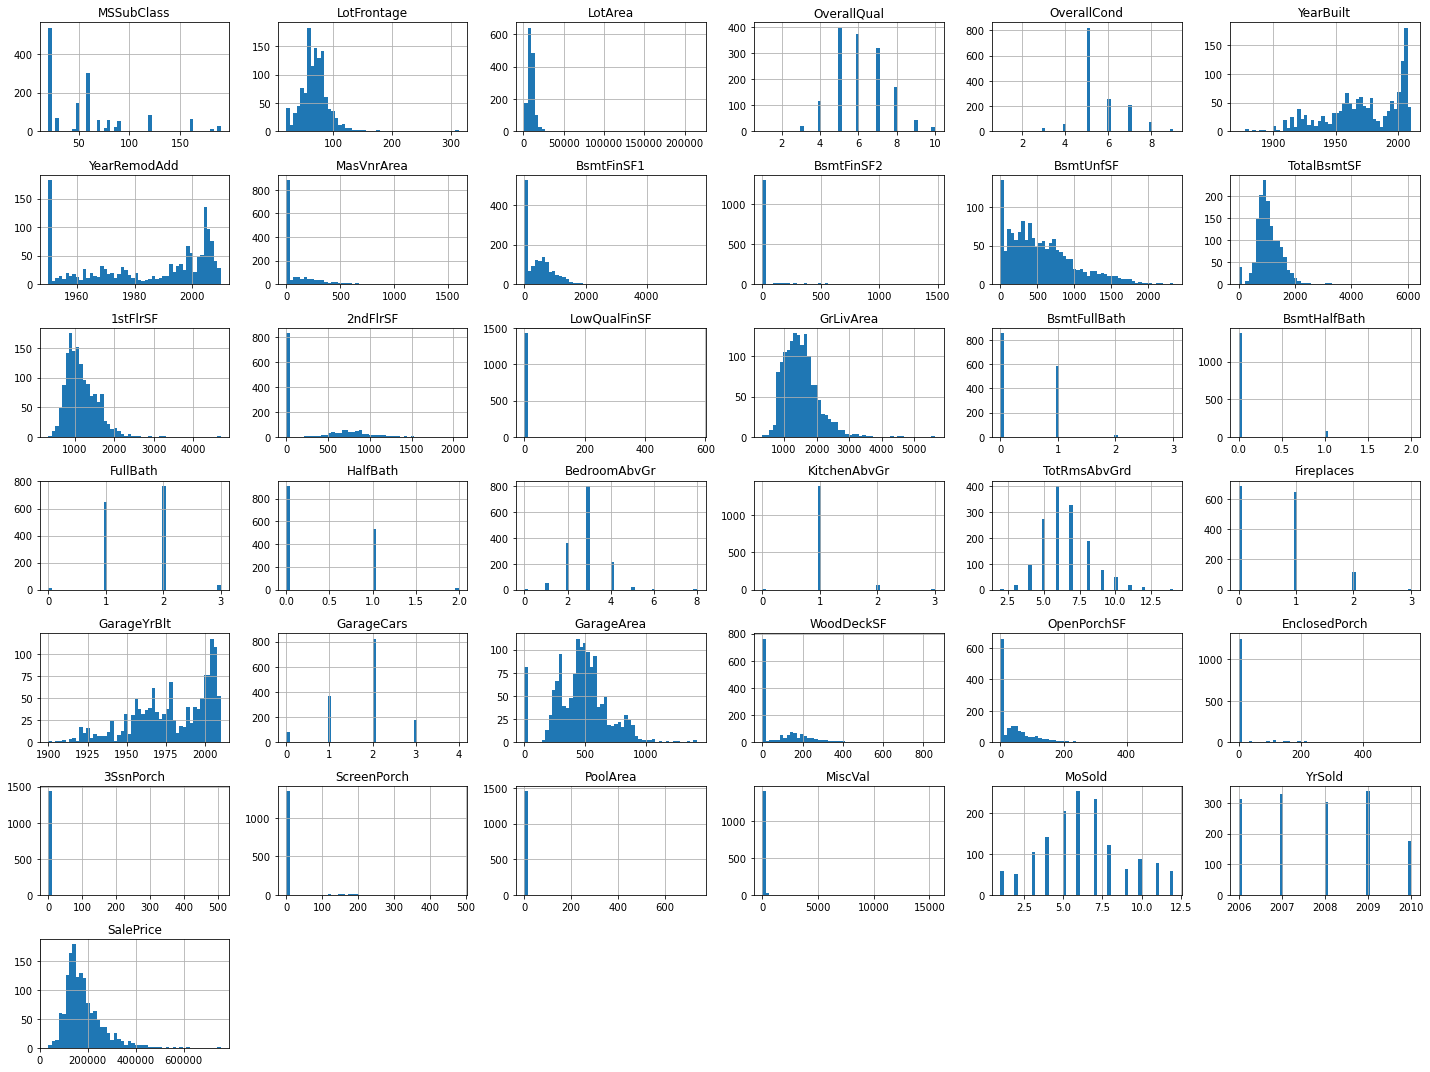

In [38]:
train_df.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

## 相関行列描画

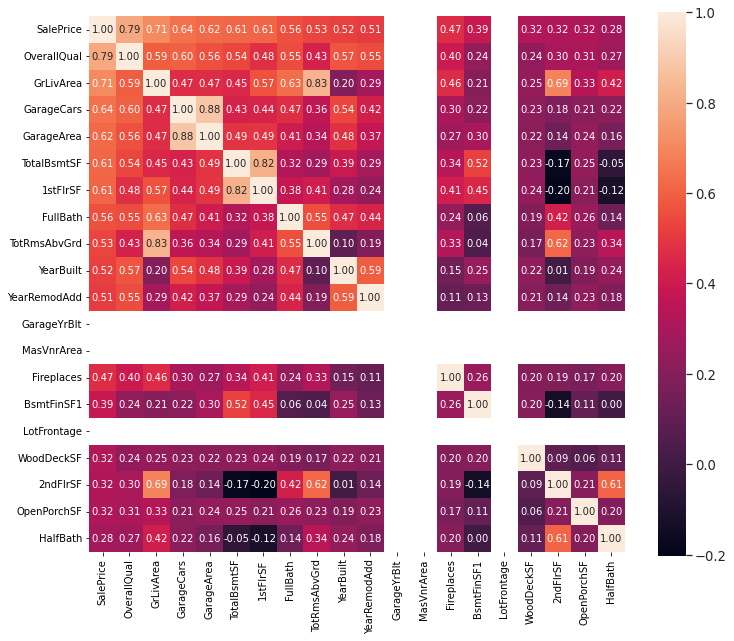

In [41]:
k = 20 # number of variables for heatmap
df = train_df.copy()
corrmat = df.corr()
cols = corrmat.nlargest(k, "SalePrice")["SalePrice"].index
cm = np.corrcoef(df[cols].values.T)
fig, ax = plt.subplots(figsize=(12, 10))
sns.set(font_scale=1.2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## 平米関係の特徴量と目的変数との散布図

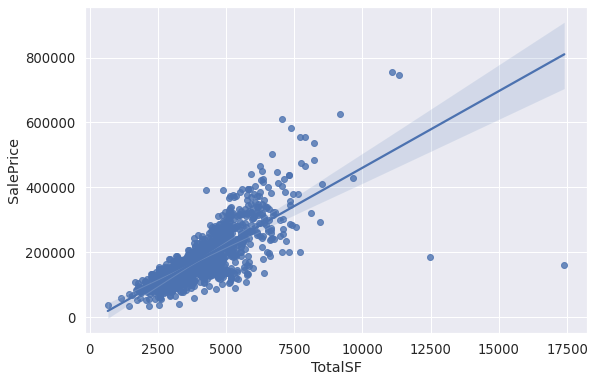

In [52]:
df = train_df.copy()
df["TotalSF"] = df["1stFlrSF"] + df["2ndFlrSF"] + df["TotalBsmtSF"] + df["GrLivArea"]
fig = plt.figure(figsize=(9, 6))
sns.regplot(x=df["TotalSF"], y=df["SalePrice"])
plt.xlabel("TotalSF")
plt.ylabel("SalePrice")
plt.show()

## 一番相関が高かった特徴量の箱ひげ図

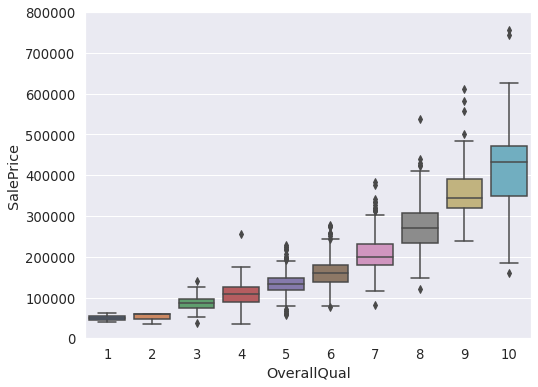

In [53]:
var = "OverallQual"
df = train_df.copy()
data = pd.concat([df['SalePrice'], df[var]], axis=1)
fig, ax = plt.subplots(figsize=(8, 6))
f = sns.boxplot(x=var, y="SalePrice", data=data)
f.axis(ymin=0, ymax=800000);
fig.savefig("figure6.png")

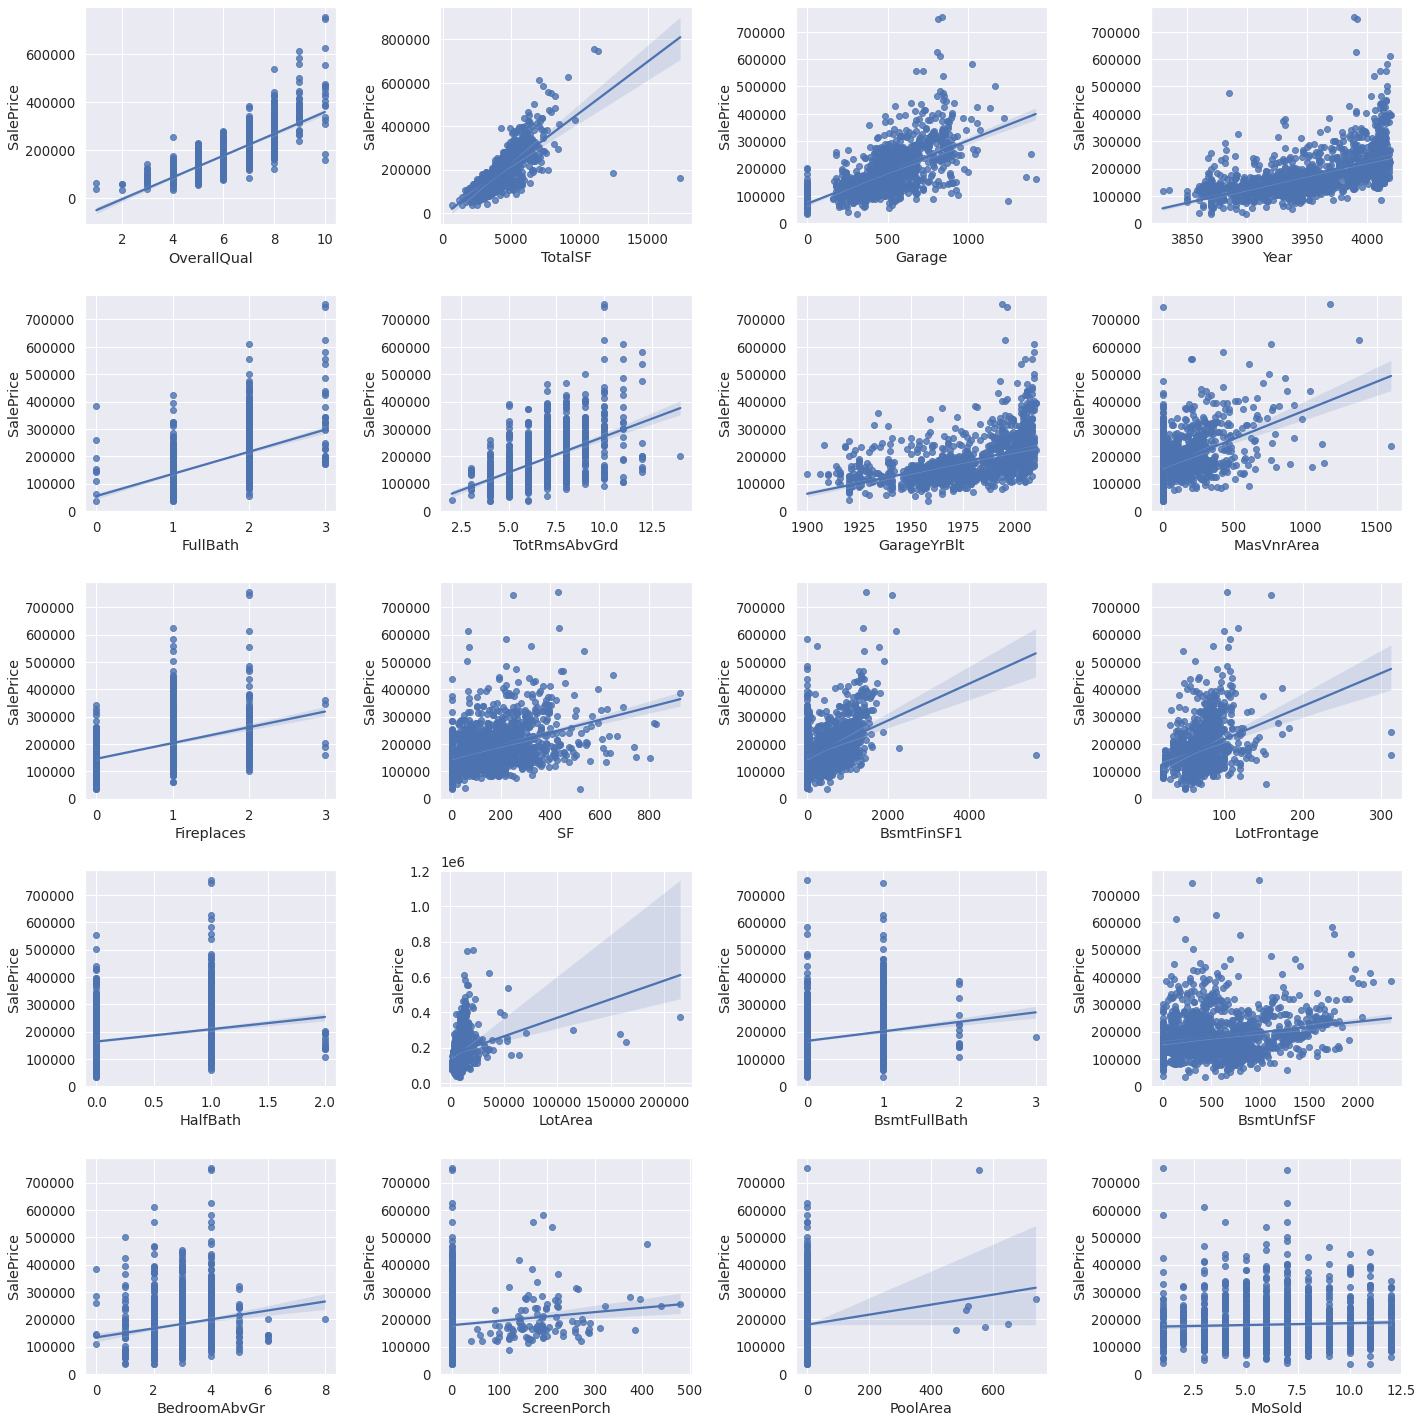

In [56]:
df = train_df.copy()
# 相関の高いものを合成
df["Garage"] = df["GarageCars"] + df["GarageArea"]
df["Year"] = df["YearBuilt"] + df["YearRemodAdd"]
df["SF"] = df["WoodDeckSF"] + df["OpenPorchSF"]
df["TotalSF"] = df["1stFlrSF"] + df["2ndFlrSF"] + df["TotalBsmtSF"] + df["GrLivArea"]
cols = ["GarageCars","GarageArea","1stFlrSF", "2ndFlrSF", "TotalBsmtSF", "GrLivArea", "YearBuilt", "YearRemodAdd", "WoodDeckSF", "OpenPorchSF"]
for i in cols:
    df = df.drop(i, axis=1)

# number of variables for heatmap
k = 21
fig = plt.figure(figsize=(20,20))
# 各列の間の相関係数算出
corrmat = df.corr()
# リストの最大値から順にk個の要素を取得
cols = corrmat.nlargest(k, "SalePrice")["SalePrice"].index
y_train = df['SalePrice']
for i in np.arange(1,k):
    X_train = df[cols[i]]
    ax = fig.add_subplot(5, 4, i)
    sns.regplot(x=X_train, y=y_train)
plt.tight_layout()
plt.show()